In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import Ridge
from sklearn.decomposition import PCA 
from sklearn import datasets, linear_model 
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")

In [2]:
train=pd.read_csv("Abalone/train.csv")

In [3]:
x_train=train.drop(["id", "Rings"], axis=1)
y_train=train["Rings"]

In [4]:
test=pd.read_csv("Abalone/test.csv") #missing Y
x_test=test.drop("id", axis=1)

In [5]:
labeler=LabelEncoder()
train_gender_label=labeler.fit_transform(x_train["Sex"])
test_gender_label=labeler.fit_transform(x_test["Sex"])

In [6]:
x_train["Sex"]=train_gender_label
x_test["Sex"]=test_gender_label

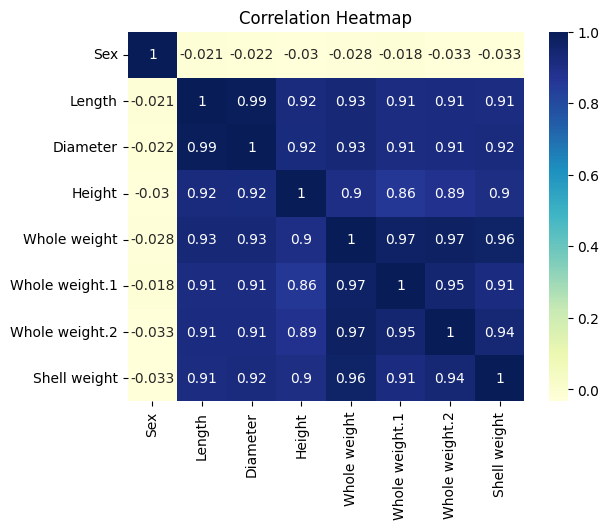

In [7]:
corr = x_train.corr()
sns.heatmap(corr, annot=True, cmap='YlGnBu')
plt.title('Correlation Heatmap')
plt.show()

In [8]:
mycolumns=x_train.columns
scaler=StandardScaler()

In [9]:
x_train=pd.DataFrame(scaler.fit_transform(x_train)) 
x_test=pd.DataFrame(scaler.transform(x_test))

## Modeling Using Regularization Techniques: Ridege Regression

In [10]:
def myf(model):
    model.fit(x_train,y_train)
    y_pred =np.maximum(model.predict(x_test),0)
    mod1_coeff = pd.DataFrame()
    mod1_coeff["Columns"]= mycolumns
    mod1_coeff['Coefficient Estimate'] = pd.Series(model.coef_)
    return ([mod1_coeff, y_pred, model])

In [11]:
mod1 = Ridge()
print(myf(mod1)[0])

          Columns  Coefficient Estimate
0             Sex              0.017658
1          Length             -0.297682
2        Diameter              0.955175
3          Height              0.850947
4    Whole weight              1.764566
5  Whole weight.1             -3.293125
6  Whole weight.2             -0.635594
7    Shell weight              2.729358


In [ ]:
test["Rings"]=pd.Series([round(i,0) for i in myf(mod1)[1]])

In [ ]:
submission=test[['id', 'Rings']]

In [ ]:
submission.to_csv("Abalone_Submission3.csv", index=False)

## Modeling Using Principal Component Regression

In [ ]:
regr = linear_model.LinearRegression()

In [ ]:
pca = PCA(n_components=3)  # choose number of components
X_pca = pca.fit_transform(x_train)

In [ ]:
regr.fit(X_pca, y_train)

In [ ]:
test_pca = pca.fit_transform(x_test)
y_pred = [int(round(i,0)) for i in np.maximum(regr.predict(test_pca),0)]

In [ ]:
x_test["Rings"]=y_pred

In [ ]:
x_test["id"]=test["id"]

In [ ]:
submission=x_test[['id', 'Rings']]
submission.to_csv("Abalone_Submission4.csv", index=False)